## Import Modules

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

## Load the Dataset

In [2]:
paths = []
labels = []
for dirname, _, filenames in os.walk('TESS data'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
        break

print(labels[:5])
print('Dataset is Loaded')

['angry', 'angry', 'angry', 'angry', 'angry']
Dataset is Loaded


In [3]:
len(paths)

2800

In [4]:
paths[:5]

['TESS data\\OAF_angry\\OAF_back_angry.wav',
 'TESS data\\OAF_angry\\OAF_bar_angry.wav',
 'TESS data\\OAF_angry\\OAF_base_angry.wav',
 'TESS data\\OAF_angry\\OAF_bath_angry.wav',
 'TESS data\\OAF_angry\\OAF_bean_angry.wav']

In [5]:
labels[:5]

['angry', 'angry', 'angry', 'angry', 'angry']

In [6]:
## Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,TESS data\OAF_angry\OAF_back_angry.wav,angry
1,TESS data\OAF_angry\OAF_bar_angry.wav,angry
2,TESS data\OAF_angry\OAF_base_angry.wav,angry
3,TESS data\OAF_angry\OAF_bath_angry.wav,angry
4,TESS data\OAF_angry\OAF_bean_angry.wav,angry


In [7]:
df['label'].value_counts()

label
angry      400
disgust    400
fear       400
happy      400
neutral    400
ps         400
sad        400
Name: count, dtype: int64

## Exploratory Data Analysis

<Axes: xlabel='label', ylabel='count'>

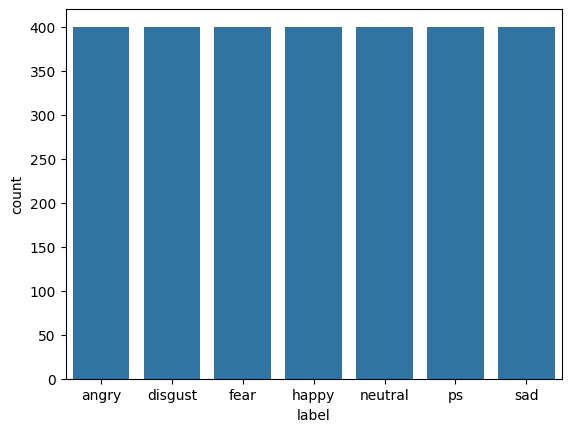

In [8]:
sns.countplot(data=df, x='label')

In [9]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()
    
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

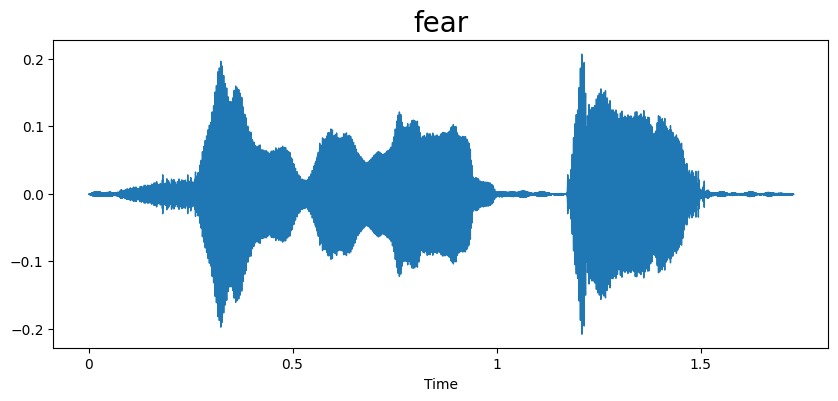

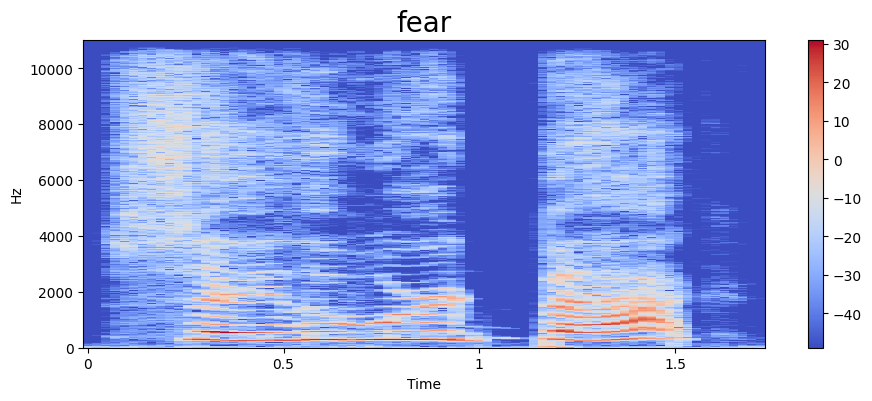

In [10]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

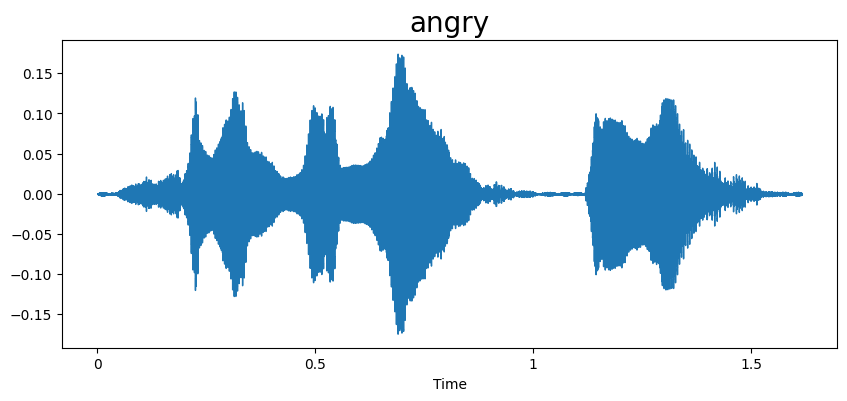

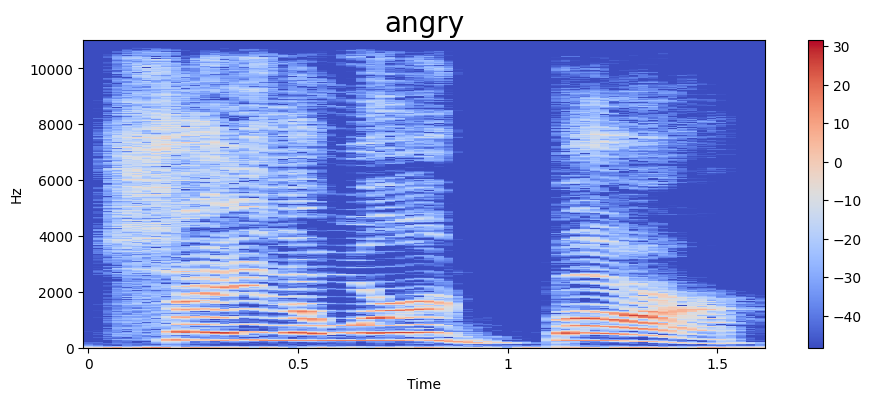

In [11]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

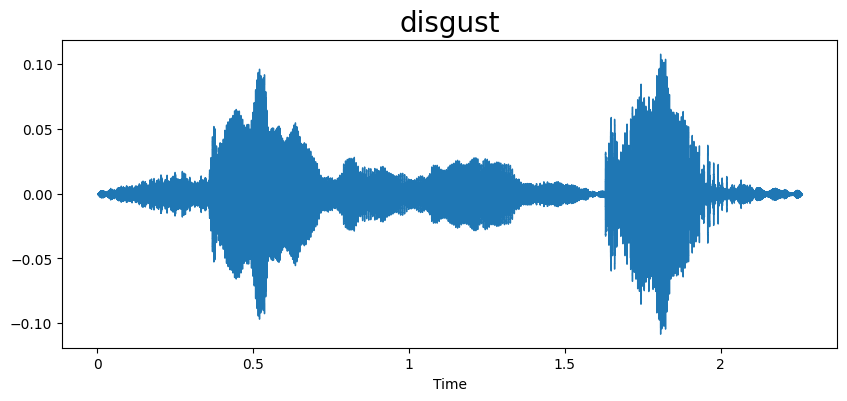

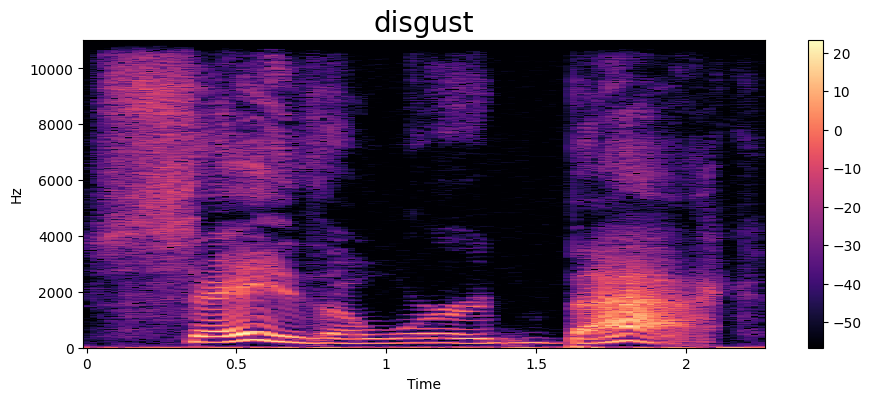

In [12]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

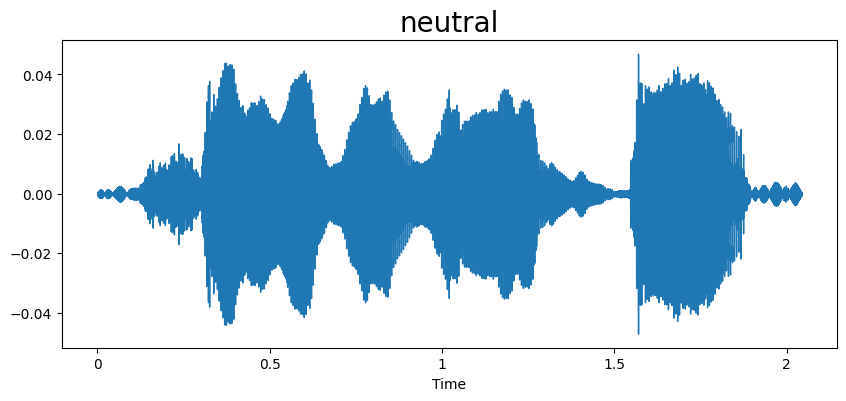

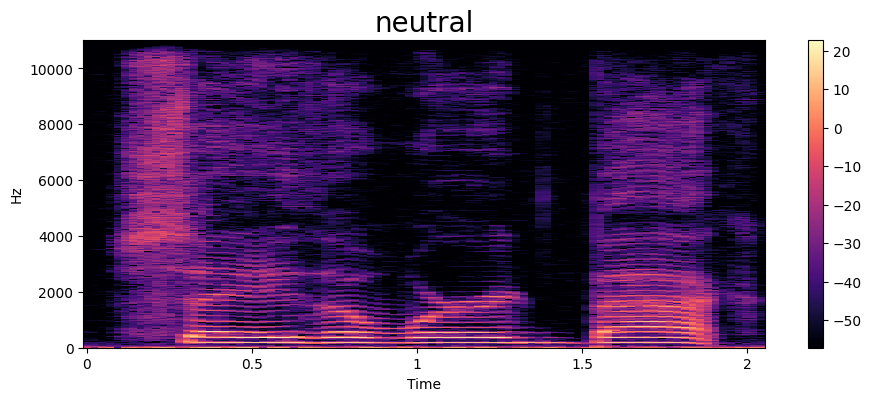

In [13]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

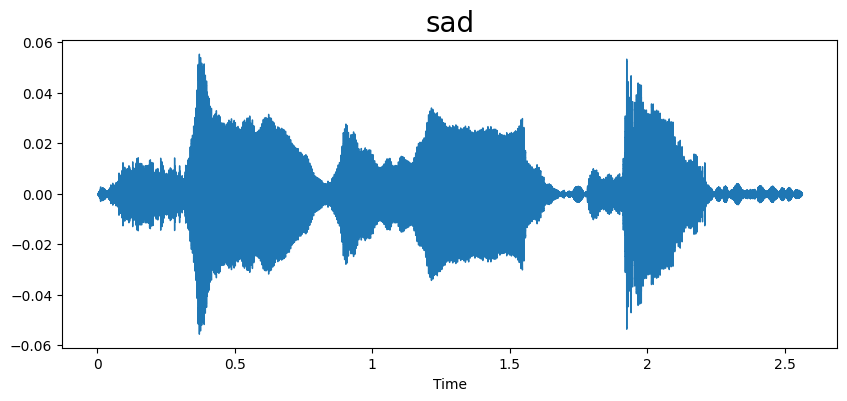

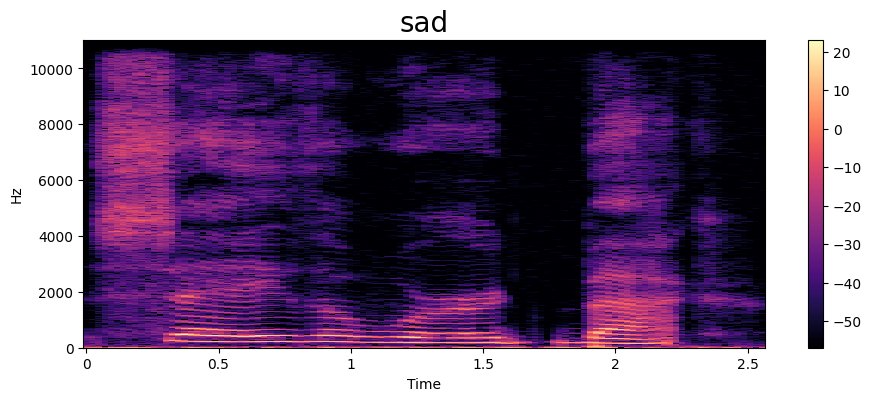

In [14]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

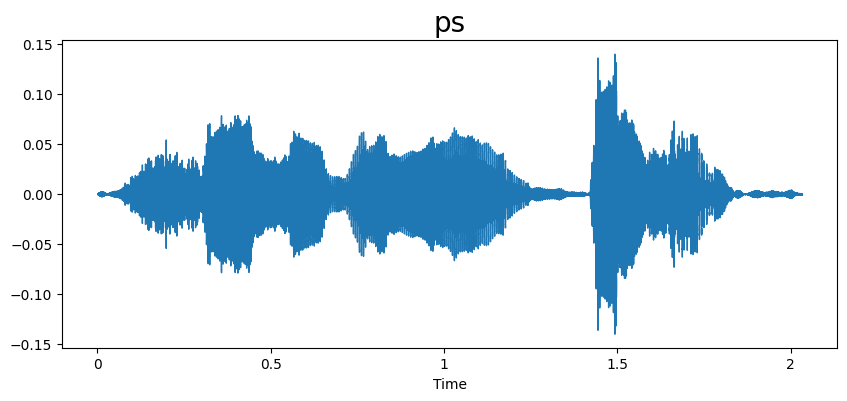

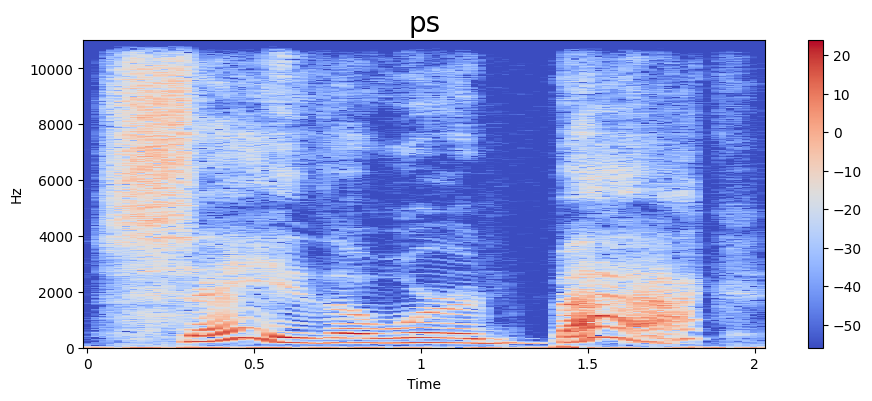

In [15]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

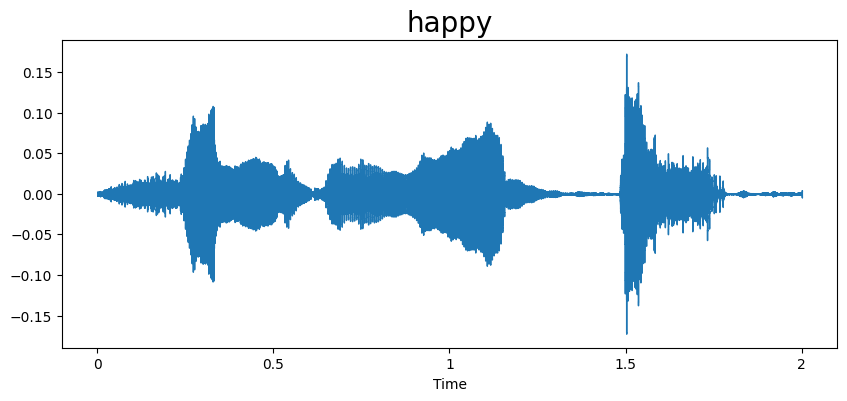

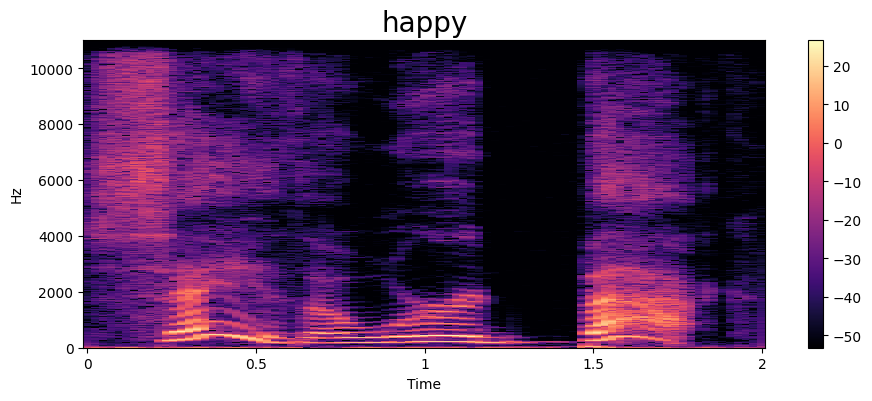

In [16]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

## Feature Extraction

In [17]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [18]:
extract_mfcc(df['speech'][0])

array([-3.96986206e+02,  7.74405365e+01, -1.95927906e+01, -2.16666889e+01,
       -2.11275601e+00,  1.00753632e+01, -2.03667068e+01, -6.09244919e+00,
       -7.21228313e+00, -5.57366073e-01, -1.83255339e+00,  2.02101618e-01,
        7.27550924e-01,  1.31773746e+00,  2.88633800e+00,  2.85579062e+00,
       -4.71292210e+00, -4.43651056e+00, -1.62115955e+00, -1.02398405e+01,
       -7.55126143e+00, -1.79688025e+00, -7.03765249e+00,  9.43658352e+00,
        8.35585499e+00,  2.17123604e+01,  1.92169914e+01,  2.03489265e+01,
        1.34133663e+01,  8.33917236e+00,  3.94722193e-01,  5.11131477e+00,
        9.56873894e+00,  5.45486784e+00,  2.50996375e+00, -1.82390714e+00,
        4.86896229e+00,  9.31392288e+00,  2.08914971e+00, -1.90649164e+00],
      dtype=float32)

In [19]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [20]:
X_mfcc

0       [-396.9862, 77.44054, -19.59279, -21.666689, -...
1       [-465.73267, 98.77373, 0.65600884, -32.74544, ...
2       [-429.79196, 46.124, 1.555048, -0.21709408, 2....
3       [-403.46118, 76.3237, -12.531774, -22.288858, ...
4       [-434.05756, 77.4455, 10.8654995, 16.092943, 8...
                              ...                        
2795    [-553.2201, 89.83577, 27.215466, 16.407124, 19...
2796    [-589.23676, 96.20407, 36.96118, 15.014446, 28...
2797    [-533.41815, 85.43242, 27.791998, 19.307178, 2...
2798    [-548.6142, 110.16424, 31.91024, 12.572517, 22...
2799    [-549.2962, 102.374565, 32.268833, 26.261616, ...
Name: speech, Length: 2800, dtype: object

In [21]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [22]:
## input split
X = np.expand_dims(X, -1)
X.shape

(2800, 40, 1)

In [23]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [24]:
y = y.toarray()

In [25]:
y.shape

(2800, 7)

## Create the LSTM Model

In [26]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 7)               

In [27]:
# Train the model
history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=64)

Epoch 1/50


35/35 [==============================] - 5s 87ms/step - loss: 1.1111 - accuracy: 0.5982 - val_loss: 1.0327 - val_accuracy: 0.4107
Epoch 2/50
35/35 [==============================] - 3s 79ms/step - loss: 0.3533 - accuracy: 0.8754 - val_loss: 0.2626 - val_accuracy: 0.9071
Epoch 3/50
35/35 [==============================] - 3s 80ms/step - loss: 0.1852 - accuracy: 0.9455 - val_loss: 0.4092 - val_accuracy: 0.8768
Epoch 4/50
35/35 [==============================] - 3s 82ms/step - loss: 0.1146 - accuracy: 0.9607 - val_loss: 0.1694 - val_accuracy: 0.9286
Epoch 5/50
35/35 [==============================] - 3s 77ms/step - loss: 0.1632 - accuracy: 0.9522 - val_loss: 0.3057 - val_accuracy: 0.8821
Epoch 6/50
35/35 [==============================] - 3s 74ms/step - loss: 0.1004 - accuracy: 0.9661 - val_loss: 0.0656 - val_accuracy: 0.9804
Epoch 7/50
35/35 [==============================] - 2s 64ms/step - loss: 0.0773 - accuracy: 0.9754 - val_loss: 0.1566 - val_accuracy: 0.9375
Epoch 8/50


In [28]:
# best val accuracy: 72.32
# use checkpoint to save the best val accuracy model
# adjust learning rate for slow convergence

## Plot the results

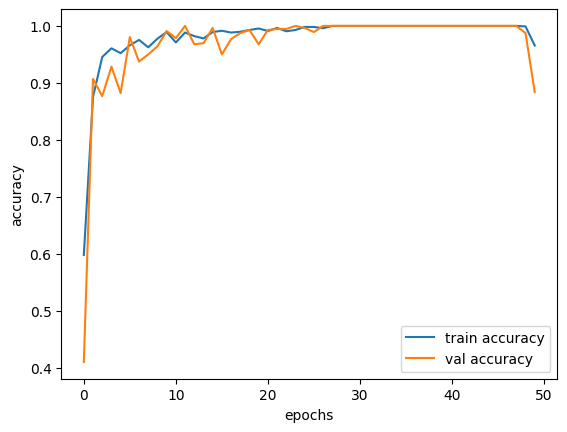

In [29]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

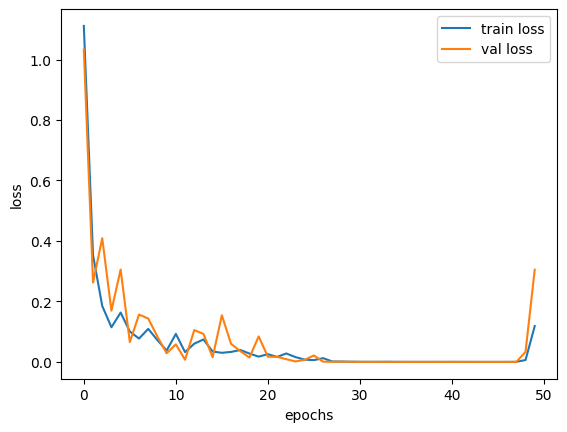

In [30]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()